##### K Means Clustering

In [3]:
#importing the libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
#creating the dataset using make_blobs
from sklearn.datasets import make_blobs

X,y = make_blobs(n_samples = 1000,centers = 4,n_features = 2,random_state = 42)

# Here we are creating y just for visualization purpose.
# and also we are initializing centers to simulate fake data.

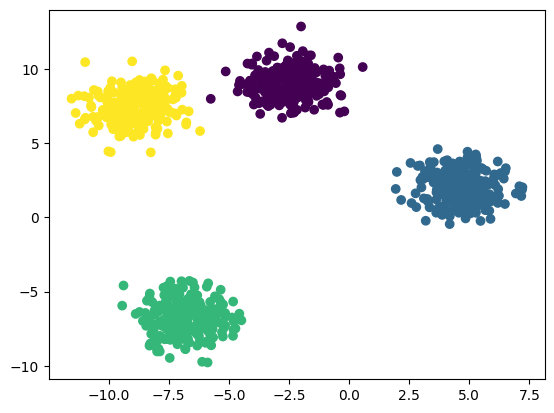

In [10]:
plt.scatter(X[:,0],X[:,1],c = y)

In [11]:
#Implementing train test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)

#y_train and y_test is nowhere will be used to train the model.

In [12]:
#Standarization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
#Implement KMeans
from sklearn.cluster import KMeans
wcss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters = i,init = "k-means++")
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

print(wcss)

[1500.0000000000002, 797.7855955353361, 183.9634695358997, 45.17706987214074, 41.0279610345117, 37.37976166558062, 34.47016343454105, 30.134923653706778, 26.504948659999748, 24.520236818777157, 23.0605773864479, 22.188879082183348, 19.167366985083177, 20.620605525321444, 18.206549767019915, 16.098727989016254, 14.995838855602733, 14.33301288712744, 13.969413796238301]


([<matplotlib.axis.XTick at 0x121d24bc400>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19')])

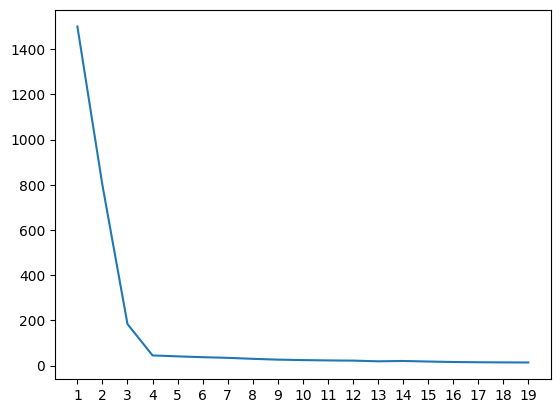

In [ ]:
plt.plot(range(1,20),wcss)
plt.xticks(range(1,20))


As we can observe, we are getting the value of k as 4. This is the main purpose of KMeans clustering.

In [19]:
#train the model for the obtained 'k'
kmeans = KMeans(n_clusters = 4,init = "k-means++")
kmeans.fit(X_train)

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


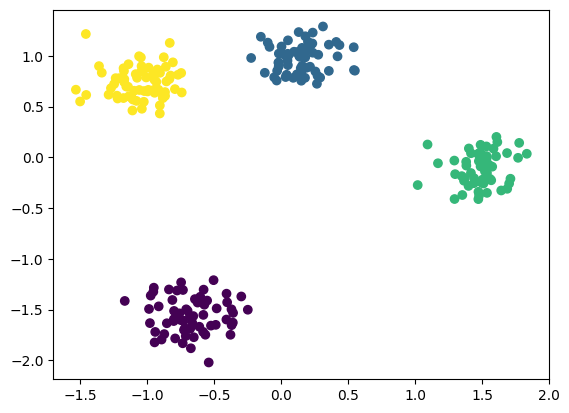

In [20]:
#testing the data
y_pred = kmeans.predict(X_test)
plt.scatter(X_test[:,0],X_test[:,1],c = y_pred)

In [ ]:
#We can get the value of K also using
# 1. kneelocator using library kneed
# 2. Silhouette score

([<matplotlib.axis.XTick at 0x121d90686d0>,
 [Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19')])

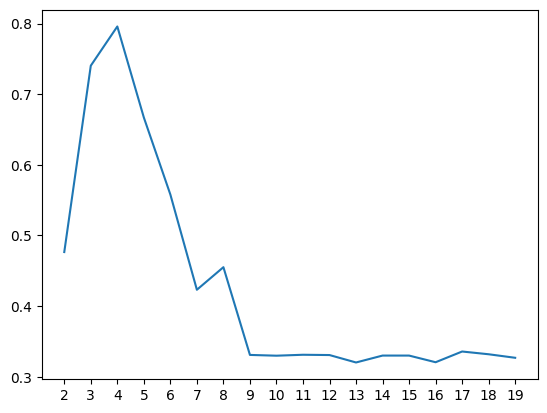

In [23]:
from sklearn.metrics import silhouette_score
coef = []
for i in range(2,20):
    kmeans = KMeans(n_clusters = i,init = "k-means++")
    kmeans.fit(X_train)
    score = silhouette_score(X_train,kmeans.labels_)
    coef.append(score)

plt.plot(range(2,20),coef)
plt.xticks(range(2,20))